# Perceptrón - Prima Indians Diabetes Dataset

Conjunto de datos disponibles en sklearn.datasets_openml. Este conjunto de datos contiene información
clínica de pacientes, como nivel de glucosa, presión aterial 

## Obtención de datos 

In [1]:
# cargar los paquetes requeridos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml

In [2]:
# cargar el dataset
diabetes = fetch_openml(name='diabetes', version=1, as_frame=True)

# cargar en el dataframe
df = diabetes.frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [4]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Preprocesamiento

In [5]:
# Separar características  (X) y etiqueta (Y)
# Obtener X eliminando la columna de etiqueta
X = df.drop(columns=['class'])

# Obtener Y convirtiendo la etiqueta en un valor numerico 
Y = df['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)

In [6]:
# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=26, stratify=Y)

In [7]:
# Estandarizar las características (importante para el perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # estandariza este conjunto de datos y asignalo a esta variable
X_test = scaler.fit_transform(X_test) # estandariza este conjunto de datos y asignalo a esta variable

## Entrenamiento del Perceptron 

In [8]:
# crear y entrenar el perceptron
perceptron = Perceptron(max_iter=4000, eta0=0.01, random_state=26)
perceptron.fit(X_train, Y_train)

Perceptron(eta0=0.01, max_iter=4000, random_state=26)

In [9]:
# Realizar predicciones
Y_pred = perceptron.predict(X_test)

### Evaluacion de la eficiencia del modelo 

In [10]:
eficienca = accuracy_score(Y_test, Y_pred)
print(f'Eficiencia: {eficienca*100:.2f}%')
print('\nReporte de clasificación:\n', classification_report(Y_test, Y_pred))


Eficiencia: 76.62%

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.65      0.74      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



## Matrices de peso

In [11]:
# obtener los pesos (matriz de coeficientes)
pesos = perceptron.coef_

# obtener el sesgo (intercepto, bias o umbral)
sesgo = perceptron.intercept_

# imprimir los pesos y el sesgo
print('\nPesos:', pesos, '\n\nSesgo (bias):', sesgo, '\n\nEpocas:', perceptron.n_iter_)


Pesos: [[ 0.01439627  0.05285947 -0.00581887  0.01734709 -0.00393253  0.01565109
   0.03479192  0.00115098]] 

Sesgo (bias): [-0.01] 

Epocas: 6


## Gráfica de la frontera de decisión 

In [12]:
import matplotlib.pyplot as plt

# seleccionar solo dos características (glucosa e IMC)
X_subset = X_train[:,[1,5]]
y_subset = Y_train

In [13]:
perceptron.fit(X_subset, y_subset)

Perceptron(eta0=0.01, max_iter=4000, random_state=26)

In [14]:
# Obtener los pesos y bias 
w = perceptron.coef_
b = perceptron.intercept_

In [15]:
# crear una linea de decision
x1_min, x1_max = X_subset[:, 0].min(), X_subset[:, 0].max()
x2_min, x2_max = X_subset[:, 1].min(), X_subset[:, 1].max()

x1_values = np.linspace(x1_min, x1_max, 100)
x2_values = (-w[0][0] / w[0][1]) * x1_values - (b[0] / w[0][1])

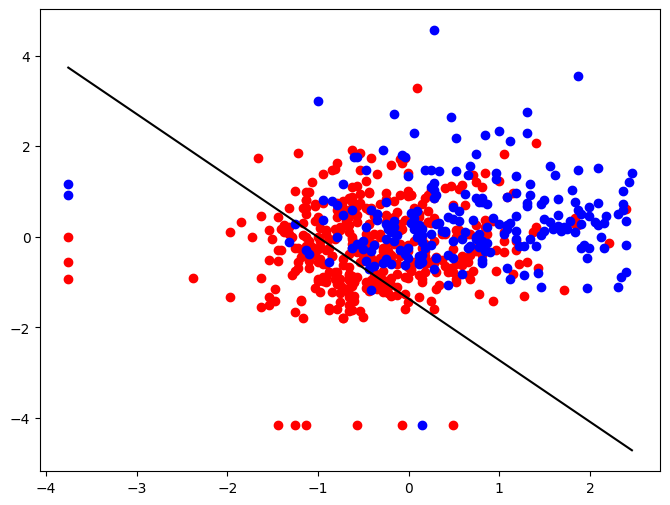

In [16]:
# graficar los puntos y la linea de decision
plt.figure(figsize=(8, 6))
plt.scatter(X_subset[y_subset == 0][:,0], X_subset[y_subset == 0][:,1], color='red', label='No diabetes')
plt.scatter(X_subset[y_subset == 1][:,0], X_subset[y_subset == 1][:,1], color='blue', label='Diabetes')

# linea de decision
plt.plot(x1_values, x2_values, '-k', label='Frontera de decision');

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(5,),
    max_iter=2000,
    random_state=33,
    activation="logistic",
)

mlp.fit(X_train, Y_train)

print(f"numero de capas en la red {len(mlp.coefs_)}")
print(f"numero en las capas ocultas {mlp.hidden_layer_sizes[0]}")

numero de capas en la red 2
numero en las capas ocultas 5


In [21]:
# obtener pesos y bias

w = mlp.coefs_
b = mlp.intercepts_
print("\nPesos:", w, "\n\nSesgo (bias):", b, "\n\nEpocas:", mlp.n_iter_)


Pesos: [array([[ 0.34250074,  0.34167924, -0.49410274, -0.68389399, -0.28585481],
       [ 0.93546589,  0.85789616, -0.80557229, -1.10189041, -1.14199474],
       [ 0.10684991, -0.38271041,  0.20421113,  0.29049565,  0.11458871],
       [ 0.26939251, -0.00680642,  0.27406136,  0.31860781,  0.15747799],
       [ 0.21997417,  0.0062527 ,  0.00566401,  0.01768448, -0.19087388],
       [ 0.48725971,  1.02801036, -0.9506793 , -0.51907977, -0.63730022],
       [ 0.72495437,  0.55166307, -0.30945467, -0.25013637, -0.43501134],
       [-0.09042814,  0.27225542, -0.58628372, -0.73450132,  0.01366024]]), array([[ 0.61399229],
       [ 0.89175043],
       [-0.95069051],
       [-1.05415176],
       [-1.17685754]])] 

Sesgo (bias): [array([-0.32719922, -0.16558304,  0.05619917, -0.21414314,  0.20977616]), array([0.10037999])] 

Epocas: 426


In [22]:
# realizar predicciones
y_pred2 = mlp.predict(X_test)
eficiencia2 = accuracy_score(Y_test, y_pred2)
print(f'Eficiencia del perceptron multicapa: {eficiencia2*100:.2f}%')
print('\nReporte de clasificación:\n', classification_report(Y_test, y_pred2))

Eficiencia del perceptron multicapa: 76.62%

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



El recall es que tanto clasifico como positivo lo que es positivo y como negativo lo que es negativo